In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import re

In [2]:
# importing the dataset
data = pd.read_csv('data/training_data.csv')

## Data cleaning

In [3]:
data.head()

,id,text,class,volunteers_count,judgment_confidence
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
3,2199,i think the protection part is the part where ...,0,4.0,0.793927
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162


In [4]:
# renaming the cols
data.rename(columns={'class':'target'}, inplace=True)
data.sample(5)

,id,text,target,volunteers_count,judgment_confidence
7185,13708,diet coke trash,2,3.0,0.666667
5825,10439,"""@FunnyPicsDepot: this the ""I play soccer, che...",2,3.0,1.000000
4618,9233,i feel horrible again today,0,3.0,0.779666
13288,11861,i definetly need both as i have been feeling q...,0,3.0,0.709825
6335,1699,i feel doomed to failure,0,3.0,0.986306


In [5]:
# missing values
data.isnull().sum()

id                     0
text                   0
target                 0
volunteers_count       0
judgment_confidence    0
dtype: int64

In [6]:
# check for duplicate values
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15464 entries, 0 to 15463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15464 non-null  int64  
 1   text                 15464 non-null  object 
 2   target               15464 non-null  int64  
 3   volunteers_count     15464 non-null  float64
 4   judgment_confidence  15464 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 604.2+ KB


In [8]:
data.shape

(15464, 5)

## EDA

In [9]:
data.head()

,id,text,target,volunteers_count,judgment_confidence
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
3,2199,i think the protection part is the part where ...,0,4.0,0.793927
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162


In [10]:
data['target'].value_counts()

target
1    4397
0    3826
2    3440
3    1756
4    1573
5     472
Name: count, dtype: int64

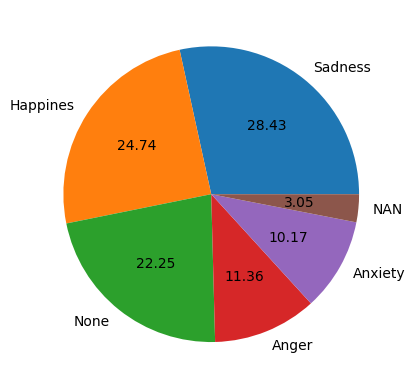

In [11]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['Sadness','Happines','None','Anger','Anxiety','NAN'], autopct="%0.2f")
plt.show()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data['num_characters'] = data['text'].apply(len)

In [14]:
data.head()

,id,text,target,volunteers_count,judgment_confidence,num_characters
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835,69
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853,174
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762,39
3,2199,i think the protection part is the part where ...,0,4.0,0.793927,136
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162,52


In [15]:
# num of words

data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,15464.000000,15464.000000,15464.000000
mean,95.906751,19.463722,1.124612
std,53.068669,11.020495,0.462027
min,8.000000,1.000000,1.000000
25%,54.000000,11.000000,1.000000
50%,87.000000,18.000000,1.000000
75%,130.000000,26.000000,1.000000
max,522.000000,274.000000,6.000000


In [18]:
# Sadeness
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3826.000000,3826.000000,3826.0
mean,92.816780,18.408782,1.0
std,56.126898,11.028551,0.0
min,11.000000,3.000000,1.0
25%,49.000000,10.000000,1.0
50%,80.000000,16.000000,1.0
75%,123.000000,24.000000,1.0
max,299.000000,61.000000,1.0


In [19]:
# Happiness
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4397.000000,4397.000000,4397.0
mean,98.501478,19.482829,1.0
std,55.005524,10.770076,0.0
min,9.000000,2.000000,1.0
25%,56.000000,11.000000,1.0
50%,89.000000,18.000000,1.0
75%,130.000000,26.000000,1.0
max,298.000000,64.000000,1.0


In [20]:
# None
data[data['target'] == 2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3440.000000,3440.000000,3440.000000
mean,94.514826,20.926453,1.560174
std,41.222209,10.966872,0.846034
min,8.000000,1.000000,1.000000
25%,60.000000,13.000000,1.000000
50%,97.000000,21.000000,1.000000
75%,132.000000,28.000000,2.000000
max,522.000000,274.000000,6.000000


In [21]:
# Anger
data[data['target'] == 3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1756.000000,1756.000000,1756.0
mean,95.987472,19.069476,1.0
std,57.285747,11.400293,0.0
min,9.000000,2.000000,1.0
25%,50.000000,10.000000,1.0
50%,85.000000,17.000000,1.0
75%,130.000000,25.000000,1.0
max,298.000000,62.000000,1.0


In [22]:
# Anxiety
data[data['target'] == 4][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1573.000000,1573.000000,1573.0
mean,97.523840,19.094088,1.0
std,56.134315,11.037528,0.0
min,9.000000,2.000000,1.0
25%,54.000000,11.000000,1.0
50%,86.000000,17.000000,1.0
75%,128.000000,25.000000,1.0
max,296.000000,60.000000,1.0


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

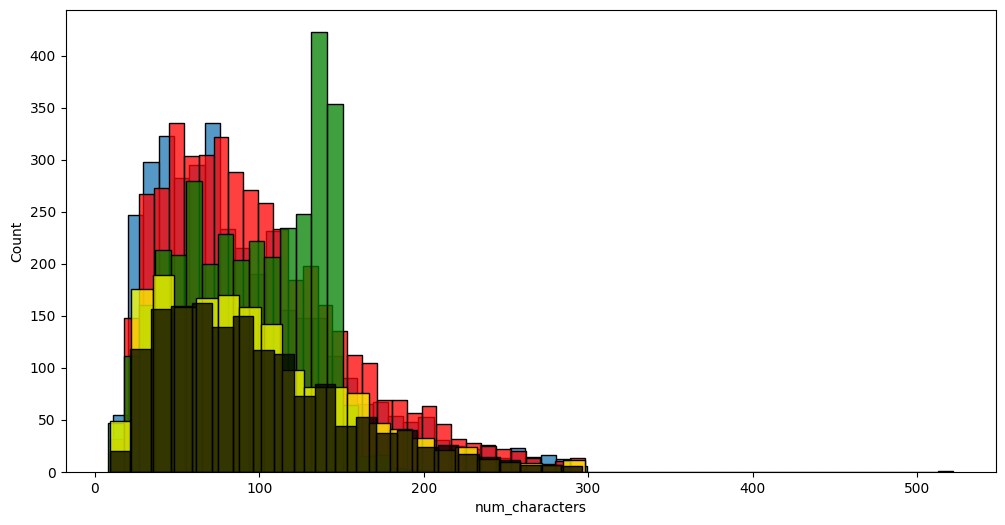

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')
sns.histplot(data[data['target'] == 2]['num_characters'], color='green')
sns.histplot(data[data['target'] == 3]['num_characters'], color='yellow')
sns.histplot(data[data['target'] == 4]['num_characters'], color='black')

<Axes: xlabel='num_words', ylabel='Count'>

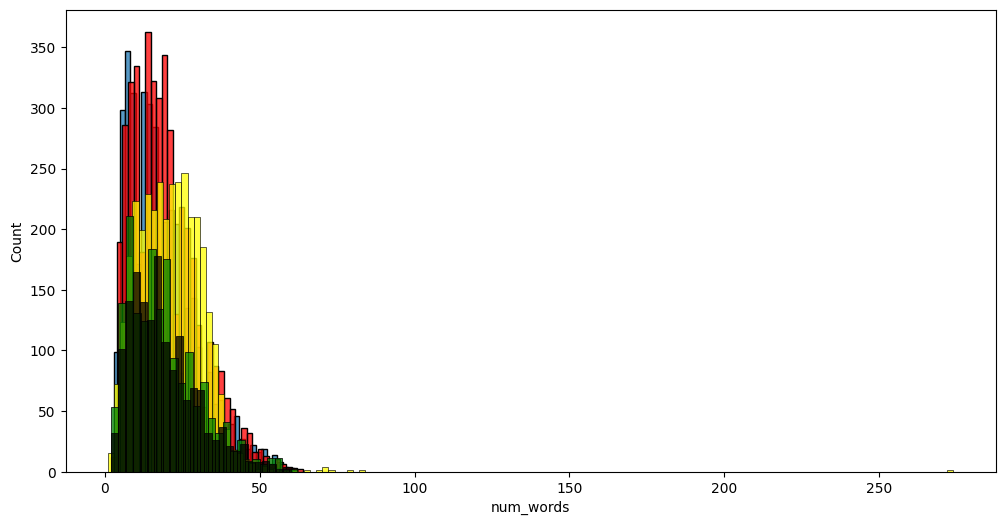

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'], color='red')
sns.histplot(data[data['target'] == 2]['num_words'], color='yellow')
sns.histplot(data[data['target'] == 3]['num_words'], color='green')
sns.histplot(data[data['target'] == 4]['num_words'], color='black')

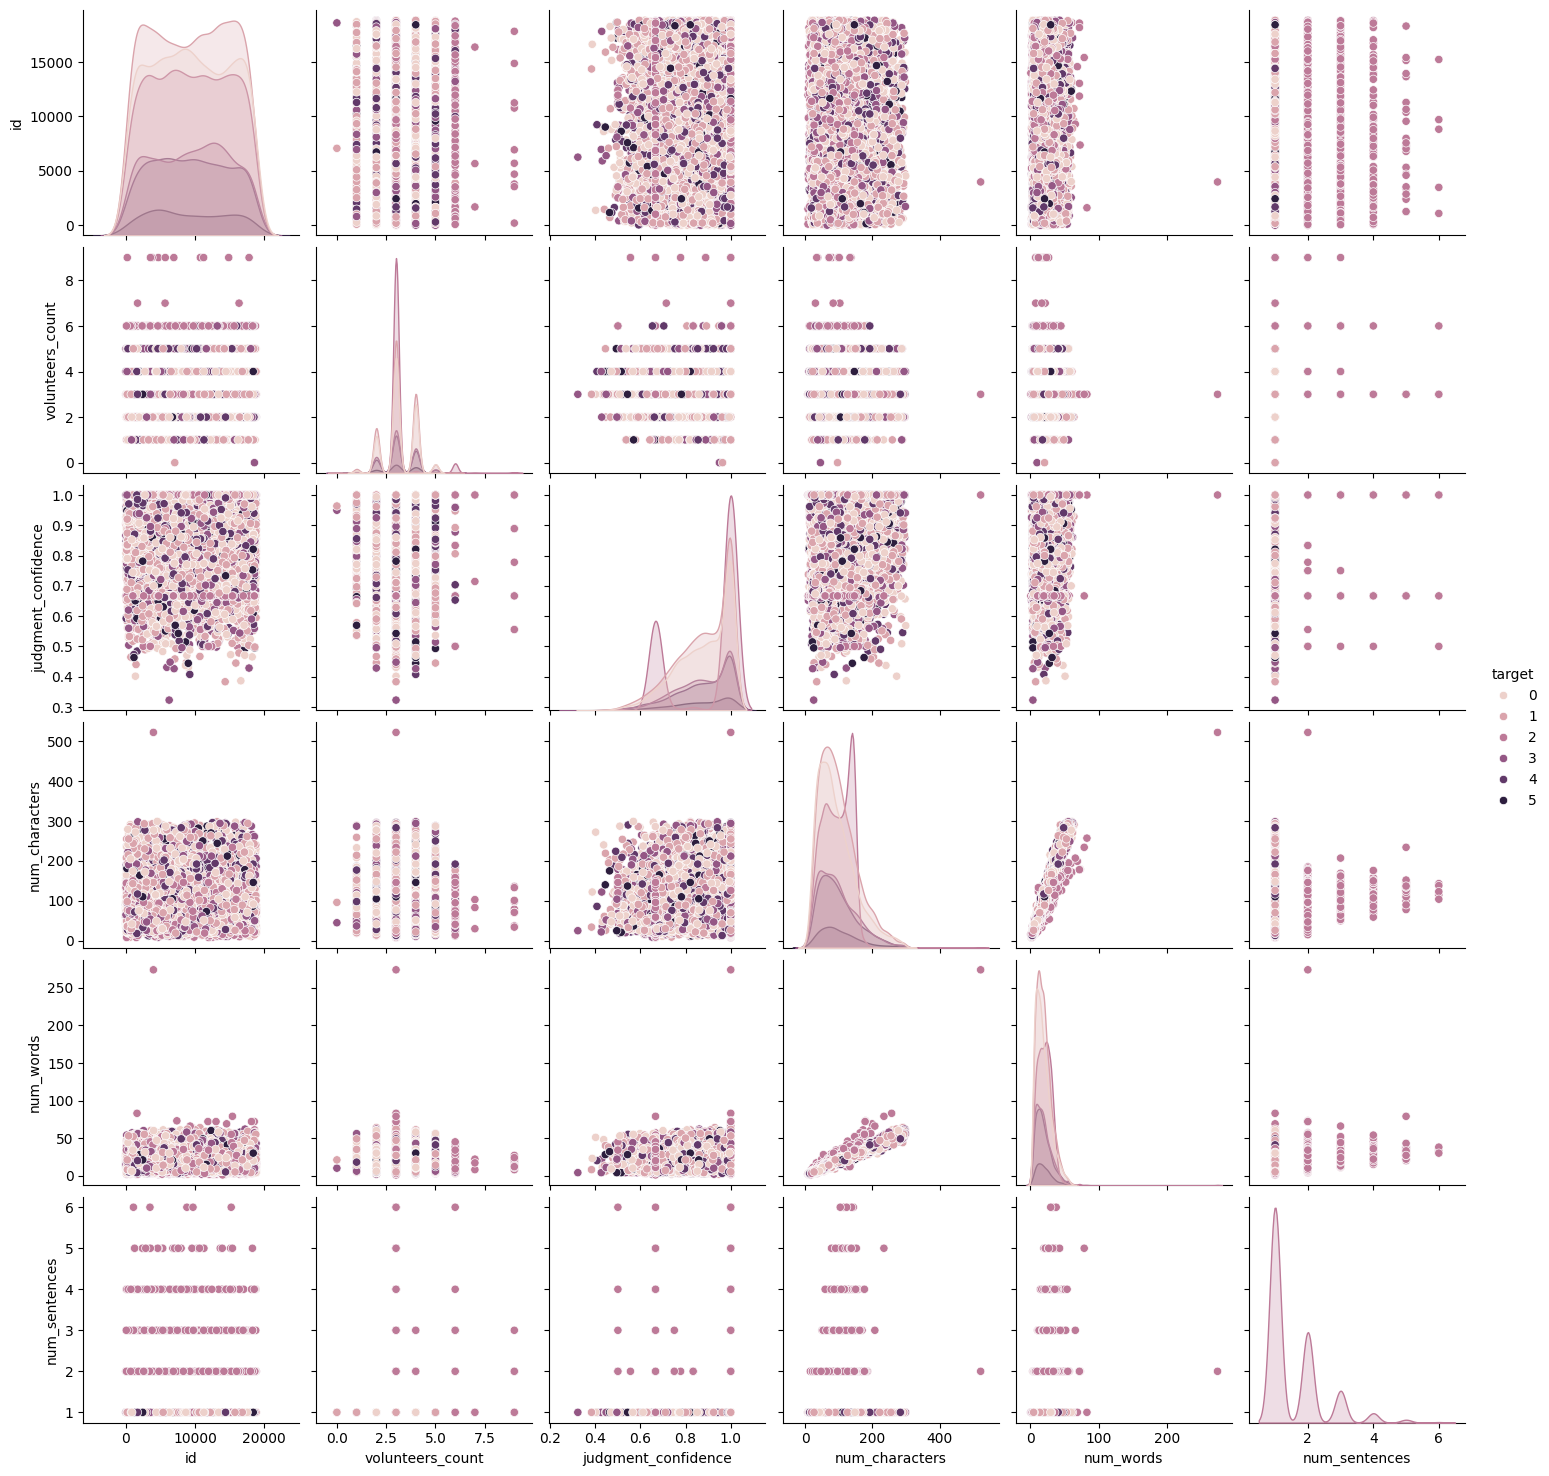

In [26]:
sns.pairplot(data,hue='target')

## Data preprocessing

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def text_transform(text) :
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        lemma = lemmatizer.lemmatize(i)
        y.append(lemma)


    return " ".join(y)

In [32]:
text_transform("RT @120Sports: Twitter tipped its cap to say #FarewellCaptain to Jeter in his Yankee Stadium finale. VIDEO: http://t.co/QdldmWBwXJ ")

'rt 120sports twitter tipped cap say farewellcaptain jeter yankee stadium finale video http'

In [33]:
data['transformed_text'] = data['text'].apply(text_transform)

In [34]:
data.head()

,id,text,target,volunteers_count,judgment_confidence,num_characters,num_words,num_sentences,transformed_text
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835,69,13,1,would feel hesitant using medical system needed
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853,174,32,1,try stuff wildly feeling heart messy inside sa...
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762,39,9,1,need find way feel pretty
3,2199,i think the protection part is the part where ...,0,4.0,0.793927,136,27,1,think protection part part feel abused reason ...
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162,52,9,1,im feeling mellow enjoying cooler weather


In [44]:
# Tokenization
import spacy

In [47]:
nlp = spacy.load("en_core_web_sm")

In [49]:
tokenized_texts = []
for text in data['transformed_text']:
    doc = nlp(text)
    tokenized_text = [token.text for token in doc]
    tokenized_texts.append(tokenized_text)

# Example: Adding tokenized texts back to the DataFrame
data['tokenized_text'] = tokenized_texts

In [50]:
data.head()

,id,text,target,volunteers_count,judgment_confidence,num_characters,num_words,num_sentences,transformed_text,tokenized_text
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835,69,13,1,would feel hesitant using medical system needed,"[would, feel, hesitant, using, medical, system..."
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853,174,32,1,try stuff wildly feeling heart messy inside sa...,"[try, stuff, wildly, feeling, heart, messy, in..."
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762,39,9,1,need find way feel pretty,"[need, find, way, feel, pretty]"
3,2199,i think the protection part is the part where ...,0,4.0,0.793927,136,27,1,think protection part part feel abused reason ...,"[think, protection, part, part, feel, abused, ..."
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162,52,9,1,im feeling mellow enjoying cooler weather,"[i, m, feeling, mellow, enjoying, cooler, weat..."


In [52]:
def pad_sequences(sequences, max_length, padding_value=0):
    padded_sequences = []
    for sequence in sequences:
        if len(sequence) >= max_length:
            padded_sequence = sequence[:max_length]
        else:
            padded_sequence = sequence + [padding_value] * (max_length - len(sequence))
        padded_sequences.append(padded_sequence)
    return padded_sequences

# Convert tokenized texts to sequences of integers
sequences = tokenizer.texts_to_sequences(data['tokenized_text'])

# Padding sequences to ensure uniform length
max_length = 100  # Specify the maximum length you want for the sequences
padded_sequences = pad_sequences(sequences, max_length)

# Example: Adding padded sequences back to the DataFrame
data['padded_text'] = padded_sequences

NameError: name 'tokenizer' is not defined